## Importing data and relevant packages

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import quandl
import warnings
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(11.7,8.27)})

### Using Quandl Python API to extract daily stock data

In [11]:
authtoken = 'rzGh1YTCnp3fv-txhxyi'#hidden

In [12]:
Stock_prices_BRITANNIA = quandl.get("NSE/BRITANNIA", authtoken=authtoken, start_date="2012-12-31", end_date="2017-12-31")
Stock_prices_PGHH = quandl.get("NSE/PGHH", authtoken=authtoken, start_date="2012-12-31", end_date="2017-12-31")
Stock_prices_MRF = quandl.get("NSE/MRF", authtoken=authtoken, start_date="2012-12-31", end_date="2017-12-31")
SENSEX = quandl.get("BSE/SENSEX", authtoken=authtoken, start_date="2012-12-31",end_date="2017-12-31")

Fama French Indicators from 
Agarwalla, S. K., Jacob, J. and Varma, J. R. (2013), Four factor model in Indian equities market, Working Paper W.P. No. 2013-09-05, 
Indian Institute of Management, Ahmedabad.

URL: http://www.iimahd.ernet.in/~iffm/Indian-Fama-French-Momentum/four-factors-India-90s-onwards-IIM-WP-Version.pdf

link = 'http://faculty.iima.ac.in/~iffm/Indian-Fama-French-Momentum/DATA/20191231_FourFactors_and_Market_Returns_Daily.csv'

In [17]:
famafrenchfactors=pd.read_csv(link,parse_dates=['Date']) 
famafrenchfactors.set_index('Date',inplace=True)

# An idea of the performance of the stock mix

### Returns over time

In [18]:
Stock_prices_MRF['Returns'] = Stock_prices_MRF['Close'].pct_change()
Stock_prices_BRITANNIA['Returns'] = Stock_prices_BRITANNIA['Close'].pct_change()
Stock_prices_PGHH['Returns'] = Stock_prices_PGHH['Close'].pct_change()

We calculate the percent changes for each day for the stock prices of MRF,BRITANNIA and P&G for the duration we took into consideration

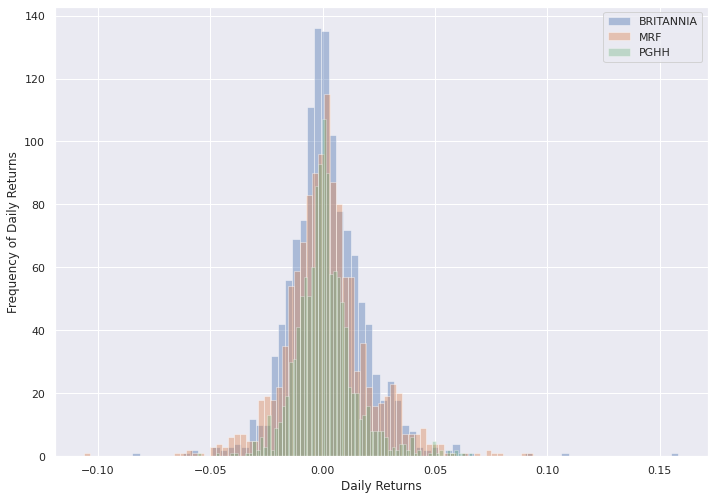

In [19]:
plt.hist(Stock_prices_BRITANNIA['Returns'].dropna(),bins=75,density=False,label='BRITANNIA',alpha=0.4)
plt.hist(Stock_prices_MRF['Returns'].dropna(),bins=75,density=False,label='MRF',alpha=0.4)
plt.hist(Stock_prices_PGHH['Returns'].dropna(),bins=75,density=False,label='PGHH',alpha=0.3)
plt.legend()
plt.xlabel('Daily Returns')
plt.ylabel('Frequency of Daily Returns')
plt.show()

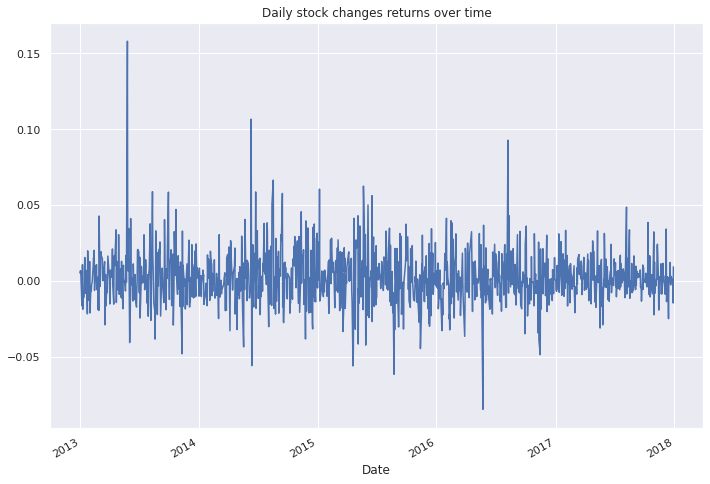

In [20]:
#plotting returns over time
Stock_prices_BRITANNIA['Returns'].plot()
plt.title('Daily stock changes returns over time');

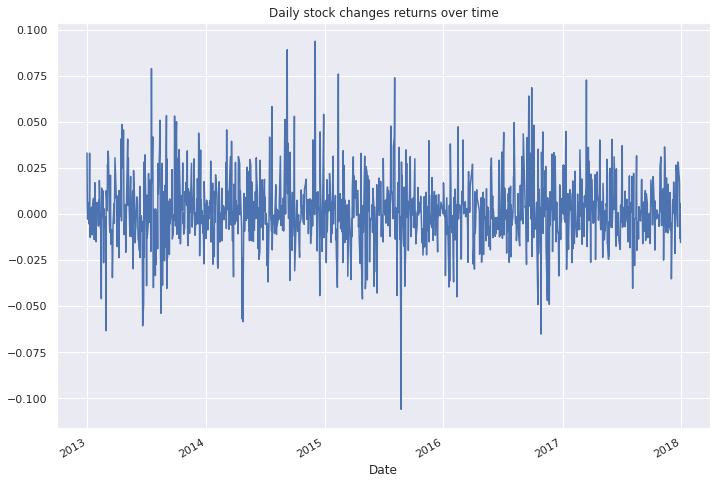

In [21]:
Stock_prices_MRF['Returns'].plot()
plt.title('Daily stock changes returns over time');

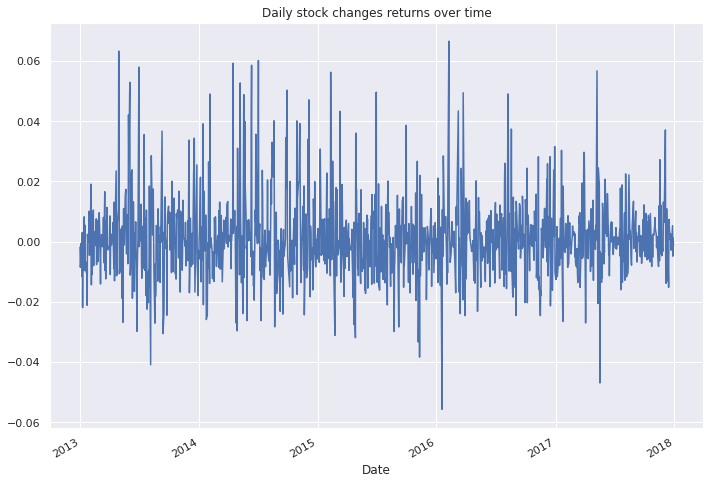

In [22]:
Stock_prices_PGHH['Returns'].plot()
plt.title('Daily stock changes returns over time');

In [ ]:
# Compute the portfolio's daily returns
asset_returns = asset_prices.pct_change()
portfolio_returns = asset_returns.dot(weights)

# Plot portfolio returns
portfolio_returns.plot().set_ylabel("Daily Return, %")
plt.show()

## Average Annualised return for individual stocks

In [23]:
#annualised average return 
mean_return_daily_MRF = np.mean(Stock_prices_MRF['Returns'])
annual_average_return_MRF = ((1+mean_return_daily_MRF)**252)-1
print('The average annual return is' ,annual_average_return_MRF*100,'%')

The average annual return is 48.62853197985686 %


In [24]:
mean_return_daily_PGHH = np.mean(Stock_prices_PGHH['Returns'])
annual_average_return_PGHH = ((1+mean_return_daily_PGHH)**252)-1
print('The average annual return is' ,annual_average_return_PGHH*100,'%')

The average annual return is 31.32703960981047 %


In [25]:
mean_return_daily_BRITANNIA = np.mean(Stock_prices_BRITANNIA['Returns'])
annual_average_return_BRITANNIA = ((1+mean_return_daily_BRITANNIA)**252)-1
print('The average annual return is' ,annual_average_return_BRITANNIA*100,'%')

The average annual return is 63.99962224126634 %


## Volatity measure of individual stocks

Lets measure the riskiness of the stocks based on volatility measure of the stocks over the period of time we have taken in consideration

In [26]:
#daily variance of stocks
sigma_daily_BRITANNNIA = np.std(Stock_prices_BRITANNIA['Returns'])
sigma_daily_PGHH = np.std(Stock_prices_PGHH['Returns'])
sigma_daily_MRF = np.std(Stock_prices_MRF['Returns'])

In [27]:
volatility_annualized_BRITANNIA = (sigma_daily_BRITANNNIA*np.sqrt(252))**2
volatility_annualized_PGHH = (sigma_daily_PGHH*np.sqrt(252))**2
volatility_annualized_MRF =(sigma_daily_MRF*np.sqrt(252))**2

In [28]:
print('Annual volatility of BRITANNIA is',volatility_annualized_BRITANNIA*100,'%' )
print('Annual volatility of MRF is',volatility_annualized_MRF*100,'%' )
print('Annual volatility of PGHH is',volatility_annualized_PGHH*100,'%' )

Annual volatility of BRITANNIA is 7.565849741530084 %
Annual volatility of MRF is 8.792868341685283 %
Annual volatility of PGHH is 4.566892932136509 %


## Skewness of the individual stocks

In finance, you would tend to want positive skewness,as this would mean that the probability of large positive returns is unusually high, and the negative returns are more closely clustered and predictable.

In [29]:
# Import skew from scipy.stats
from scipy.stats import skew

# Drop the missing values
clean_returns_BRITANNIA = Stock_prices_BRITANNIA['Returns'].dropna()

# Calculate the third moment (skewness) of the returns distribution
returns_skewness_BRITANNIA = skew(clean_returns_BRITANNIA)
print(returns_skewness_BRITANNIA)

0.9863795630330449


In [30]:
# Import skew from scipy.stats
from scipy.stats import skew

# Drop the missing values
clean_returns_MRF = Stock_prices_MRF['Returns'].dropna()

# Calculate the third moment (skewness) of the returns distribution
returns_skewness_MRF = skew(clean_returns_MRF)
print(returns_skewness_MRF)

0.3019171558933817


In [31]:
# Import skew from scipy.stats
from scipy.stats import skew

# Drop the missing values
clean_returns_PGHH = Stock_prices_PGHH['Returns'].dropna()

# Calculate the third moment (skewness) of the returns distribution
returns_skewness_PGHH = skew(clean_returns_PGHH)
print(returns_skewness_PGHH)

0.9688330907766605


Therefore we observe that all our stocks are positively skewed

## Kurtosis measure of individual stocks

An investment characterized by high kurtosis will have “fat tails” (higher frequencies of outcomes) at the extreme negative and positive ends of the distribution curve. A distribution of returns exhibiting high kurtosis tends to overestimate the probability of achieving the mean return.

High kurtosis of the return distribution implies that the investor will experience occasional extreme returns (either positive or negative), more extreme than the usual + or - three standard deviations from the mean that is predicted by the normal distribution of return

In [32]:
# Import kurtosis from scipy.stats
from scipy.stats import kurtosis

# Calculate the excess kurtosis of the returns distribution
excess_kurtosis_BRITANNIA = kurtosis(clean_returns_BRITANNIA)
print('Excess Kurtosis',excess_kurtosis_BRITANNIA)

# Derive the true fourth moment of the returns distribution
fourth_moment_BRITANNIA = excess_kurtosis_BRITANNIA + 3
print('Actual Kurtosis',fourth_moment_BRITANNIA)

Excess Kurtosis 7.727779336142682
Actual Kurtosis 10.727779336142682


In [33]:
# Import kurtosis from scipy.stats
from scipy.stats import kurtosis

# Calculate the excess kurtosis of the returns distribution
excess_kurtosis_MRF = kurtosis(clean_returns_MRF)
print('Excess Kurtosis',excess_kurtosis_MRF)

# Derive the true fourth moment of the returns distribution
fourth_moment_MRF = excess_kurtosis_MRF + 3
print('Actual Kurtosis',fourth_moment_MRF)

Excess Kurtosis 2.86885242131863
Actual Kurtosis 5.86885242131863


In [34]:
# Import kurtosis from scipy.stats
from scipy.stats import kurtosis

# Calculate the excess kurtosis of the returns distribution
excess_kurtosis_PGHH = kurtosis(clean_returns_PGHH)
print('Excess Kurtosis',excess_kurtosis_PGHH)

# Derive the true fourth moment of the returns distribution
fourth_moment_PGHH = excess_kurtosis_PGHH + 3
print('Actual Kurtosis',fourth_moment_PGHH)

Excess Kurtosis 3.500413917032149
Actual Kurtosis 6.500413917032149


## Normality Distribution check for individual returns distribution

We do a Shapiro Wilk test for checking the normality of the distribution

In [35]:
# Import shapiro from scipy.stats
from scipy.stats import shapiro

# Run the Shapiro-Wilk test on the stock returns
shapiro_results_BRITANNIA = shapiro(clean_returns_BRITANNIA)
print("Shapiro results:", shapiro_results_BRITANNIA)

# Extract the p-value from the shapiro_results
p_value = shapiro_results_BRITANNIA[1]
print("P-value: ", p_value)

Shapiro results: (0.9391140341758728, 4.1658401447916585e-22)
P-value:  4.1658401447916585e-22


In [36]:
# Import shapiro from scipy.stats
from scipy.stats import shapiro

# Run the Shapiro-Wilk test on the stock returns
shapiro_results_PGHH = shapiro(clean_returns_PGHH)
print("Shapiro results:", shapiro_results_PGHH)

# Extract the p-value from the shapiro_results
p_value = shapiro_results_PGHH[1]
print("P-value: ", p_value)

Shapiro results: (0.9332005381584167, 4.296399022742888e-23)
P-value:  4.296399022742888e-23


In [37]:
# Import shapiro from scipy.stats
from scipy.stats import shapiro

# Run the Shapiro-Wilk test on the stock returns
shapiro_results_MRF = shapiro(clean_returns_MRF)
print("Shapiro results:", shapiro_results_MRF)

# Extract the p-value from the shapiro_results
p_value = shapiro_results_MRF[1]
print("P-value: ", p_value)

Shapiro results: (0.9622354507446289, 2.1802341857833747e-17)
P-value:  2.1802341857833747e-17


None of the Return Distributions are normal

# PORTFOLIO ANALYSIS OF 3 STOCKS

## CASE 1: MARKET CAP WEIGHTED PORTFOLIO

Initially we create a portfolio mix on the ratio of the market capital present value of the three stocks

Market cap of PGHH is 30,771.64 crores.
Market cap of MRF is 27,172.92 crores.
Market cap of BRITANNIA is 65,469.31 crores.

So for calculating market cap weights,we convert each of the market capitals to fractions

In [39]:
marketcaparray= np.array([30771.64,27172.92,65469.31])

In [40]:
numstocks_weighted = 3
portfolio_weights =  marketcaparray/sum(marketcaparray)

In [41]:
portfolio_weights = portfolio_weights.round(decimals=4)
portfolio_weights

array([0.2493, 0.2202, 0.5305])

In [42]:
stocklist= [Stock_prices_PGHH['Returns'],Stock_prices_MRF['Returns'],Stock_prices_BRITANNIA['Returns']]

In [43]:
Stock_returns = pd.concat(stocklist,axis=1)

In [44]:
#Stock_returns['BRITANNIA']=Stock_prices_BRITANNIA['Returns']

In [45]:
Stock_returns.head(4)

,Returns,Returns,Returns
Date,,,
2012-12-31,NaN,NaN,NaN
2013-01-01,-0.001833,0.033099,0.005213
2013-01-02,-0.008527,0.005508,0.005884
2013-01-03,-0.007390,-0.002786,0.006742


In [47]:
Stock_returns.columns = ['pghh','mrf','britannia']

We simply multiply the stock daily returns with the market cap weights to get the portfolio returns on a daily basis

In [48]:
Weighted_returns = Stock_returns.mul(portfolio_weights,axis=1)

In [49]:
Stock_returns['Portfolio']= Weighted_returns.sum(axis=1)

In [50]:
#Stock_returns = Stock_returns.iloc[
Stock_returns = Stock_returns.iloc[1:,:]
Stock_returns.head(4)

,pghh,mrf,britannia,Portfolio
Date,,,,
2013-01-01,-0.001833,0.033099,0.005213,0.009597
2013-01-02,-0.008527,0.005508,0.005884,0.002209
2013-01-03,-0.007390,-0.002786,0.006742,0.001121
2013-01-04,-0.000647,0.006175,0.004924,0.003811


In [51]:
CumulativeReturns = ((1+Stock_returns['Portfolio']).cumprod()-1)

In [52]:
Stock_returns.head()

,pghh,mrf,britannia,Portfolio
Date,,,,
2013-01-01,-0.001833,0.033099,0.005213,0.009597
2013-01-02,-0.008527,0.005508,0.005884,0.002209
2013-01-03,-0.007390,-0.002786,0.006742,0.001121
2013-01-04,-0.000647,0.006175,0.004924,0.003811
2013-01-07,-0.011554,-0.005411,-0.016464,-0.012806


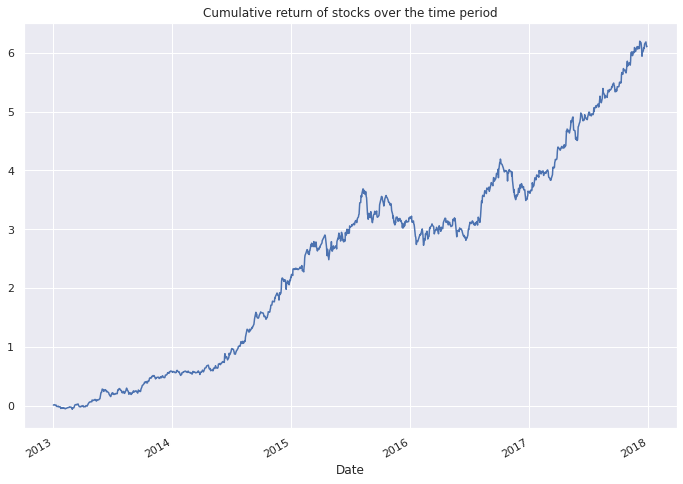

In [53]:
CumulativeReturns.plot()
plt.title('Cumulative return of stocks over the time period');

## CASE 2: EQUALLY WEIGHTED PORTFOLIO 

For this we create a stockmix of equal weights and then we shall compare it with market weighted portfolio.

In [54]:
numstocks = 3
portfolio_weights_ew = np.repeat(1/numstocks,numstocks)
Stock_returns['Portfolio_EW']= Stock_returns.iloc[:,:3].mul(portfolio_weights_ew,axis=1).sum(axis=1)

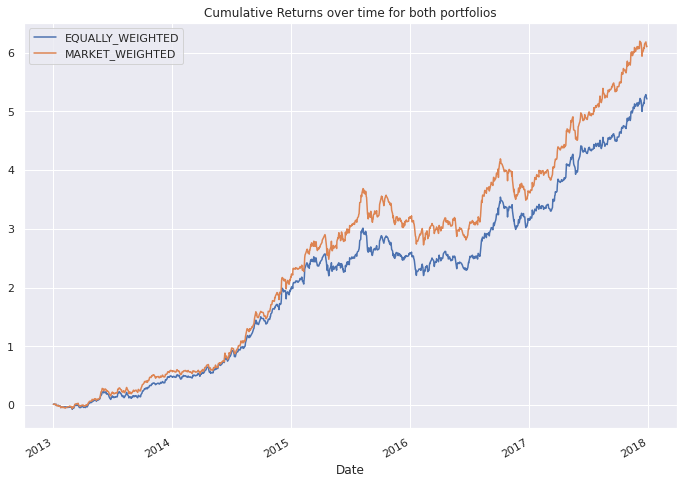

In [55]:
CumulativeReturns_EW = ((1+Stock_returns['Portfolio_EW']).cumprod()-1)
CumulativeReturns_EW.plot(label='EQUALLY_WEIGHTED')
CumulativeReturns.plot(label='MARKET_WEIGHTED')
plt.legend()
plt.title('Cumulative Returns over time for both portfolios');

## Does the price of one stock affect other?

For this we do a correlation matrix of the Daily Stock Returns for each of the stocks

In [56]:
correlation_matrix = Stock_returns.iloc[:,:3].corr()

In [57]:
print(correlation_matrix)

               pghh       mrf  britannia
pghh       1.000000  0.151055   0.185939
mrf        0.151055  1.000000   0.212514
britannia  0.185939  0.212514   1.000000


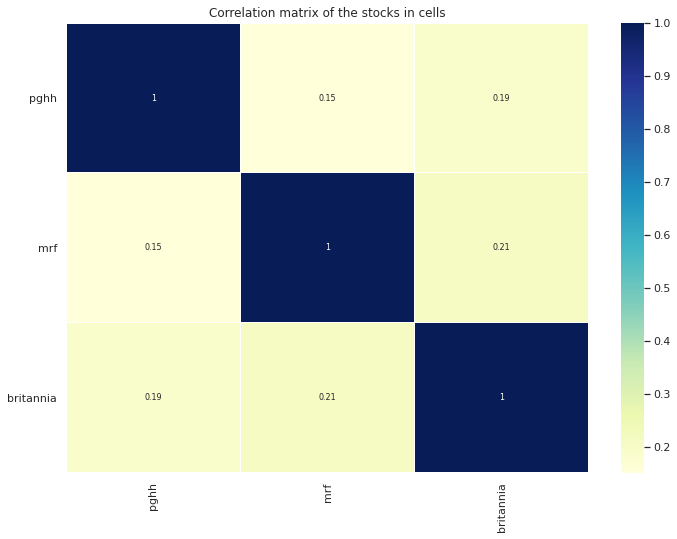

In [58]:
# Import seaborn as sns
import seaborn as sns

# Create a heatmap
sns.heatmap(correlation_matrix,
            annot=True,
            cmap="YlGnBu", 
            linewidths=0.3,
            annot_kws={"size": 8})

# Plot aesthetics
plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.title('Correlation matrix of the stocks in cells')
plt.show()

Therefore we find almost none to zero correlation between the change in stock prices

## Covariance Matrix of Stock Returns

In [59]:
# Calculate the covariance matrix
cov_mat = Stock_returns.iloc[:,:3].cov()

# Annualize the co-variance matrix
cov_mat_annual = cov_mat*252

# Print the annualized co-variance matrix
print(cov_mat_annual)

               pghh       mrf  britannia
pghh       0.045706  0.009580   0.010939
mrf        0.009580  0.088000   0.017347
britannia  0.010939  0.017347   0.075720


The correlation matrix doesn't really tell you anything about the variance of the underlying assets, only the linear relationships between assets. The co-variance (a.k.a. variance-covariance) matrix, on the other hand, contains all of this information

## Portfolio Volatility

The formula for portfolio volatility is:


$$ Portfolio Volatity = w^T⋅Σ⋅w$$
where

Σ: Covariance matrix of returns

w: Portfolio weights 

In [60]:
# Calculate the portfolio standard deviation
portfolio_volatility = np.sqrt(np.dot(portfolio_weights.T, np.dot(cov_mat_annual, portfolio_weights)))
print('Portfolio Volatility is',portfolio_volatility*100,'%')

Portfolio Volatility is 19.082827748236074 %


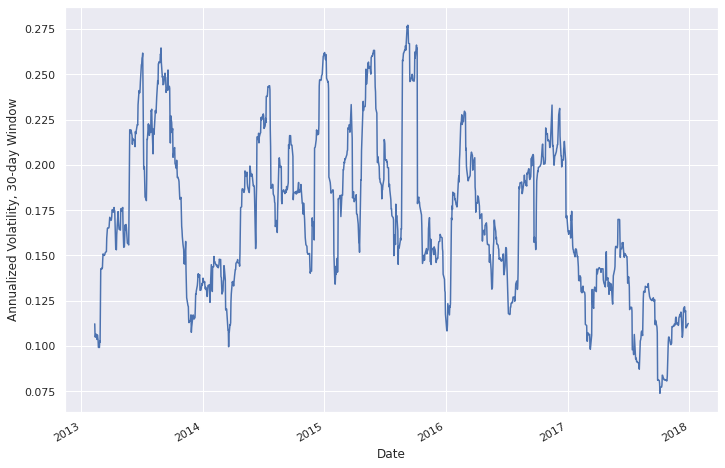

In [64]:
# Calculate the 30-day rolling window of portfolio returns
returns_windowed = portfolio_returns.rolling(30)
# Compute the annualized volatility series
volatility_series = returns_windowed.std()*np.sqrt(252)
# Plot the portfolio volatility
volatility_series.plot().set_ylabel("Annualized Volatility, 30-day Window")
plt.show()

## Sharpe ratio

The Sharpe ratio was developed by Nobel laureate William F. Sharpe, and is used to help investors understand the return of an investment compared to its risk. The ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk. Subtracting the risk-free rate from the mean return allows an investor to better isolate the profits associated with risk-taking activities. 

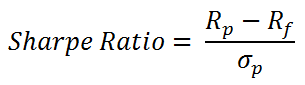

Rp = Return of portfolio

Rf = Risk-Free rate

σp = Standard deviation of portfolio’s excess return

However we assume in our calculation for sharpe ratio risk free rate to be zero

In [65]:
SR_MW = Stock_returns['Portfolio'].mean()/Stock_returns['Portfolio'].std()
SR_EW = Stock_returns['Portfolio_EW'].mean()/Stock_returns['Portfolio'].std()

In [66]:
print('Sharpe Ratio Market Weighted Portfolio:',round(SR_MW*(252**0.5),3))
print('Sharpe Ratio Equal Weighted Portfolio:',round(SR_EW*(252**0.5),3))

Sharpe Ratio Market Weighted Portfolio: 2.19
Sharpe Ratio Equal Weighted Portfolio: 2.034


## EFFICIENT FRONTIER AND MARKOWITZ PORTFOLIOS

In [67]:
closing=[Stock_prices_PGHH['Close'],Stock_prices_MRF['Close'],Stock_prices_BRITANNIA['Close']]

In [68]:
closing_stocksmix = pd.concat(closing,axis=1)
closing_stocksmix.columns = Stock_returns.iloc[:,:3].columns

In [384]:
##Log returns instead of arithmetc returns

In [70]:
log_ret = np.log(closing_stocksmix/closing_stocksmix.shift(1))
log_ret.head()

,pghh,mrf,britannia
Date,,,
2012-12-31,NaN,NaN,NaN
2013-01-01,-0.001835,0.032563,0.005199
2013-01-02,-0.008564,0.005493,0.005867
2013-01-03,-0.007417,-0.002790,0.006719
2013-01-04,-0.000647,0.006156,0.004912


In [71]:
np.random.seed(101)
num_ports = 5000
all_weights = np.zeros((num_ports,len(log_ret.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):
    weights = np.array(np.random.random(3))
    weights = weights/np.sum(weights)

    all_weights[ind,:]=weights
    
    ret_arr[ind] = np.sum((log_ret.mean()*weights)*252)

    vol_arr[ind] = np.sqrt(np.dot(weights.T,np.dot(log_ret.cov()*252,weights)))

    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [72]:
sharpe_arr.max()

2.037572578000354

In [73]:
vol_arr.min()

0.16901548075909623

In [74]:
sharpe_arr.argmax()

923

In [75]:
vol_arr.argmin()

4350

In [76]:
weightsMSR = all_weights[923,:]
weightsMSR

array([0.33082662, 0.23175098, 0.43742241])

In [77]:
weightsGMV = all_weights[4350,:]
weightsGMV

array([0.52313021, 0.21911761, 0.25775217])

In [78]:
max_sr_ret = ret_arr[923]
max_sr_vol=vol_arr[923]
GMV_ret = ret_arr[4350]
GMV_vol= vol_arr[4350]

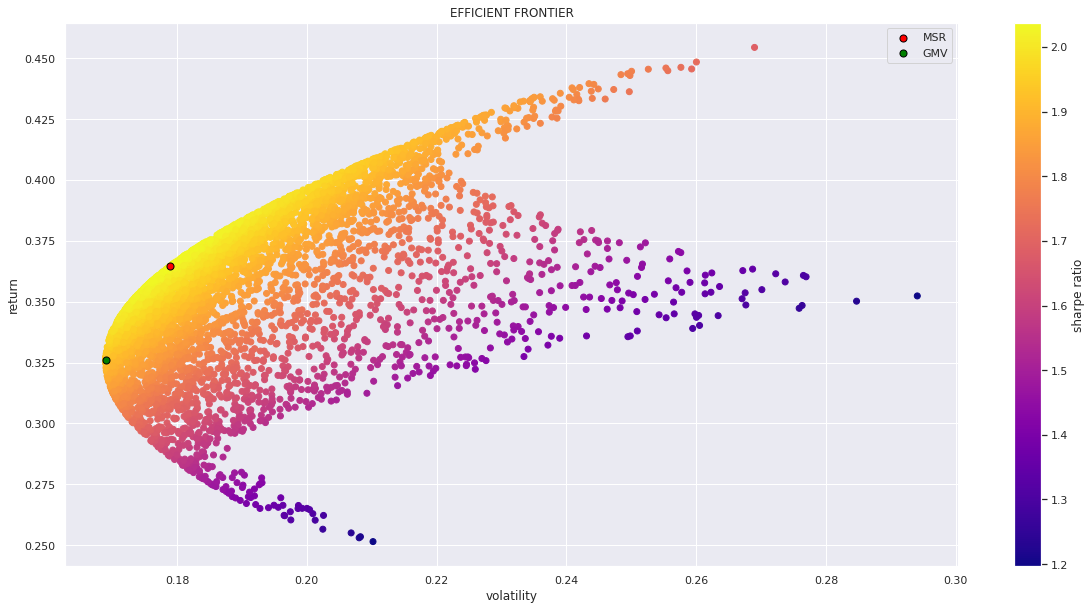

In [79]:
plt.figure(figsize=(20,10))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='sharpe ratio')
plt.xlabel('volatility')
plt.ylabel('return')
plt.scatter(max_sr_vol,max_sr_ret,c='red',label='MSR',s=50,edgecolors='black')
plt.scatter(GMV_vol,GMV_ret,c='green',s=50,label='GMV',edgecolors='black')
plt.legend()
plt.title('EFFICIENT FRONTIER');

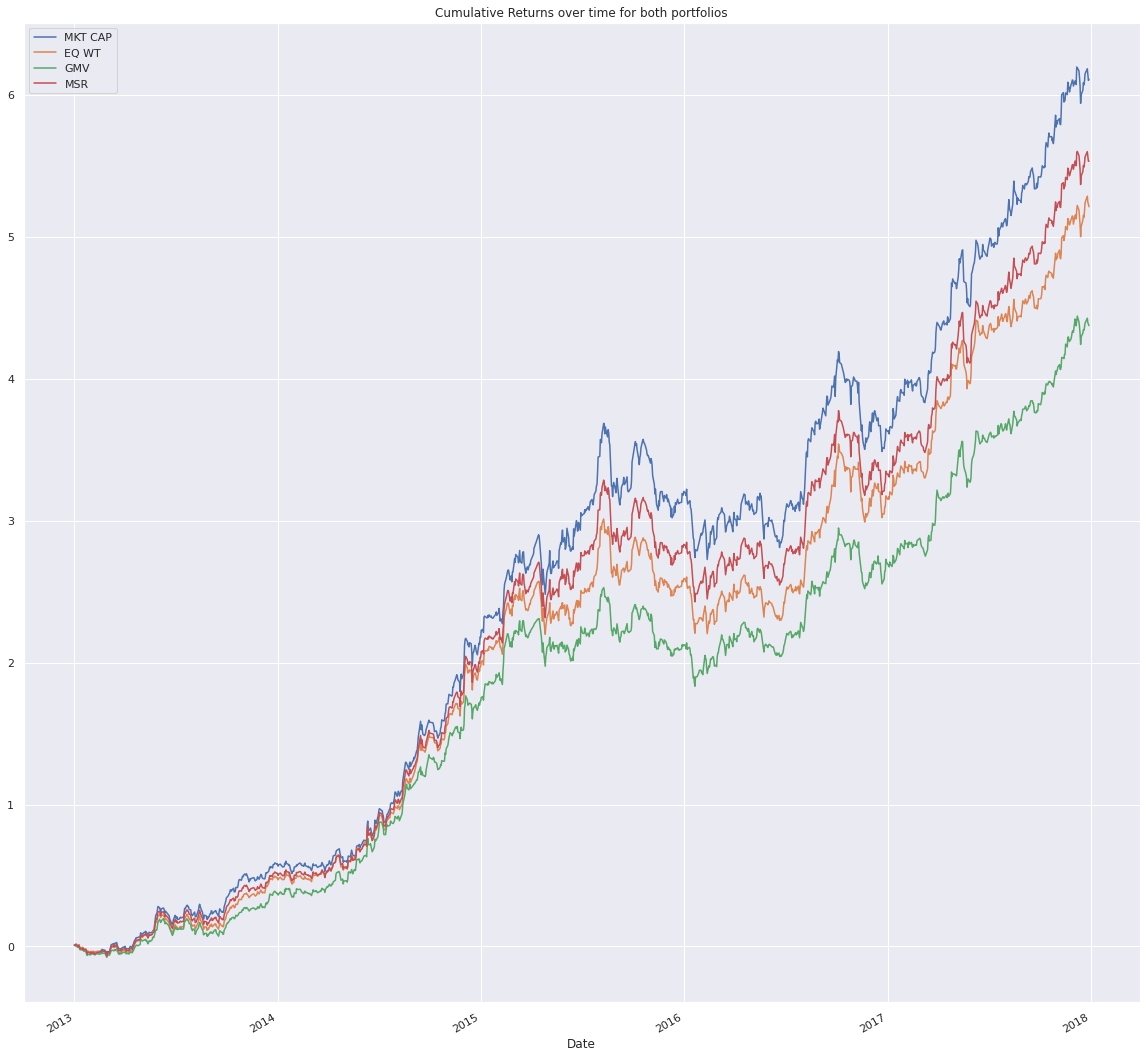

In [80]:
# Calculate the GMV portfolio returns
Stock_returns['Portfolio_MSR'] = Stock_returns.iloc[:, 0:numstocks].mul(weightsMSR, axis=1).sum(axis=1)


# Calculate the GMV portfolio returns
Stock_returns['Portfolio_GMV'] = Stock_returns.iloc[:, 0:numstocks].mul(weightsGMV, axis=1).sum(axis=1)

# Plot the cumulative returns
CumulativeReturns_P = ((1+Stock_returns['Portfolio']).cumprod()-1)
CumulativeReturns_P.plot(label='MKT CAP')

CumulativeReturns_EW = ((1+Stock_returns['Portfolio_EW']).cumprod()-1)
CumulativeReturns_EW.plot(label='EQ WT')

CumulativeReturns_GMV = ((1+Stock_returns['Portfolio_GMV']).cumprod()-1)
CumulativeReturns_GMV.plot(label='GMV',figsize=(20,20))

CumulativeReturns_MSR = ((1+Stock_returns['Portfolio_MSR']).cumprod()-1)
CumulativeReturns_MSR.plot(label='MSR',figsize=(20,20))

plt.legend()
plt.title('Cumulative Returns over time for both portfolios')
plt.show();

## CAPM MODEL

In [96]:
from scipy.stats import linregress

In [97]:
SENSEX['Returns'] = SENSEX['Close'].pct_change()

In [98]:
Stock_data_CAPM = Stock_returns.iloc[:,:7]

In [99]:
Stock_data_CAPM = Stock_returns.iloc[:,:7]
Stock_data_CAPM['Sensex'] = SENSEX['Returns']
Stock_data_CAPM['RF'] = famafrenchfactors['Rf %']
Stock_data_CAPM['RF'] = Stock_data_CAPM['RF']/100
Stock_data_CAPM['Market_Excess']=Stock_data_CAPM['Sensex']-Stock_data_CAPM['RF']
Stock_data_CAPM['Portfolio_Excess']=Stock_data_CAPM['Portfolio_MSR']-Stock_data_CAPM['RF']

In [100]:
Stock_data_CAPM.head()

,pghh,mrf,britannia,Portfolio,Portfolio_EW,Portfolio_MSR,Portfolio_GMV,Sensex,RF,Market_Excess,Portfolio_Excess
Date,,,,,,,,,,,
2013-01-01,-0.001833,0.033099,0.005213,0.009597,0.012160,0.009345,0.007637,0.007932,0.000315,0.007618,0.009030
2013-01-02,-0.008527,0.005508,0.005884,0.002209,0.000955,0.001029,-0.001737,0.006814,0.000315,0.006500,0.000715
2013-01-03,-0.007390,-0.002786,0.006742,0.001121,-0.001145,-0.000141,-0.002739,0.002564,0.000312,0.002252,-0.000453
2013-01-04,-0.000647,0.006175,0.004924,0.003811,0.003484,0.003371,0.002284,0.000976,0.000312,0.000665,0.003059
2013-01-07,-0.011554,-0.005411,-0.016464,-0.012806,-0.011143,-0.012278,-0.011473,-0.004684,0.000312,-0.004995,-0.012590


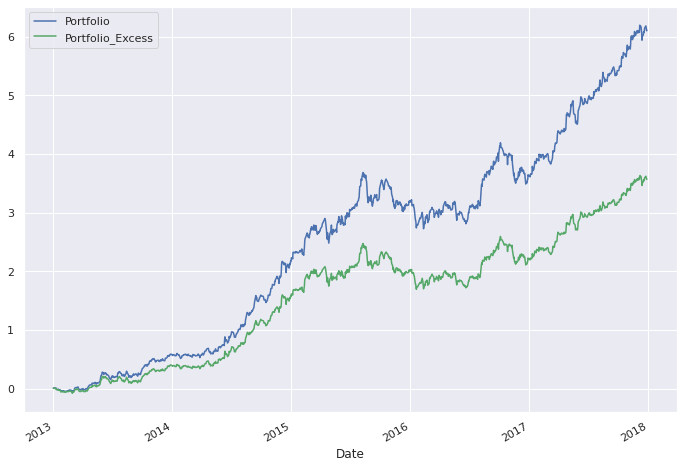

In [101]:
CumulativeReturns_p_excess = ((1+Stock_data_CAPM[['Portfolio','Portfolio_Excess']]).cumprod()-1)
CumulativeReturns_p_excess.plot();

In [102]:
# Calculate the co-variance matrix between Portfolio_Excess and Market_Excess
covariance_matrix= Stock_data_CAPM[['Portfolio_Excess', 'Market_Excess']].cov()

# Extract the co-variance co-efficient
covariance_coefficient = covariance_matrix.iloc[0, 1]
print(covariance_coefficient)

# Calculate the benchmark variance
benchmark_variance = Stock_data_CAPM['Market_Excess'].var()
print(benchmark_variance)

# Calculating the portfolio market beta
portfolio_beta = covariance_coefficient/benchmark_variance
print(portfolio_beta)

4.589253751767518e-05
8.136125786632832e-05
0.5640588496440637


In [105]:
# Import statsmodels.formula.api
import statsmodels.formula.api as smf 

# Define the regression formula
CAPM_model = smf.ols(formula='Portfolio_Excess ~ Market_Excess', data=Stock_data_CAPM)

# Fit the regression
CAPM_fit = CAPM_model.fit()
print(CAPM_fit.rsquared_adj)

# Extract the beta
regression_beta = CAPM_fit.params['Market_Excess']
print(regression_beta)

0.20089514940422637
0.5640588496440638


In [106]:
#Stock_data_CAPM['Sensex'] = SENSEX['Returns']

## FAMA FRENCH 3 FACTOR MODEL

In [107]:
famafrenchfactors.columns = ['SMB','HML','WML','RM','RF','RMRF']

In [108]:
fama3modelparam = famafrenchfactors[['SMB','HML']]

In [109]:
Stock_data_FAMA3FR = pd.concat([Stock_data_CAPM,fama3modelparam],axis=1)
Stock_data_FAMA3FR = Stock_data_FAMA3FR.dropna()

In [110]:
import statsmodels.formula.api as smf 

# Define the regression formula
FamaFrench_model = smf.ols(formula='Portfolio_Excess ~ Market_Excess + SMB + HML', data=Stock_data_FAMA3FR)

# Fit the regression
FamaFrench_fit = FamaFrench_model.fit()

# Extract the adjusted r-squared
regression_adj_rsq = FamaFrench_fit.rsquared_adj

print(regression_adj_rsq)

0.2482843978735455


In [111]:
# Extract the p-value of the SMB factor
smb_pval = FamaFrench_fit.pvalues['SMB']

# If the p-value is significant, print significant
if smb_pval < 0.05:
    significant_msg = 'significant'
else:
    significant_msg = 'not significant'

# Print the SMB coefficient
smb_coeff = FamaFrench_fit.params['SMB']
print("The SMB coefficient is ", smb_coeff, " and is ", significant_msg)

The SMB coefficient is  0.0027851253019377663  and is  significant


In [112]:
# Calculate your portfolio alpha
portfolio_alpha = FamaFrench_fit.params['Intercept']
print(portfolio_alpha)

# Annualize your portfolio alpha
portfolio_alpha_annualized = ((1+portfolio_alpha)**252)-1
print(portfolio_alpha_annualized)

0.0010417705282137334
0.3000328351974191


### HISTORICAL DRAWDOWN

In [113]:
cum_rets_BRITANNIA = ((1+Stock_prices_BRITANNIA['Returns'][1:]).cumprod()-1)

In [114]:
running_max_BRITANNIA = np.maximum.accumulate(cum_rets_BRITANNIA)

In [115]:
running_max_BRITANNIA[running_max_BRITANNIA<1] = 1

In [116]:
drawdown_BRITANNIA = (cum_rets_BRITANNIA)/running_max_BRITANNIA -1

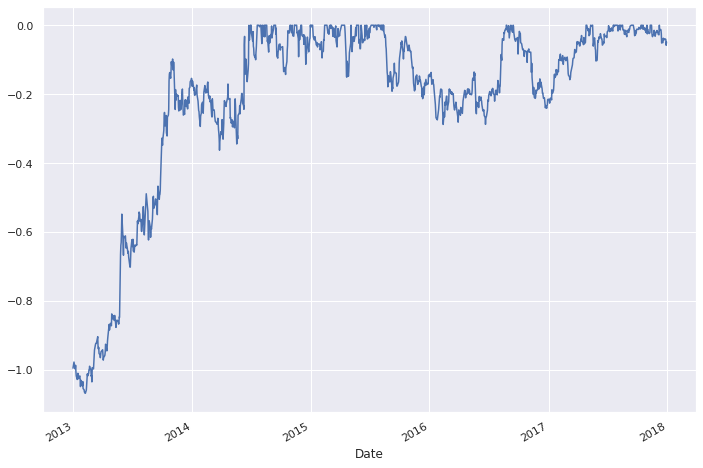

In [117]:
drawdown_BRITANNIA.plot()

In [118]:
varlevel = 95
var95 = np.percentile(Stock_prices_BRITANNIA['Returns'][1:],100-varlevel)
var95

-0.021963642641213796

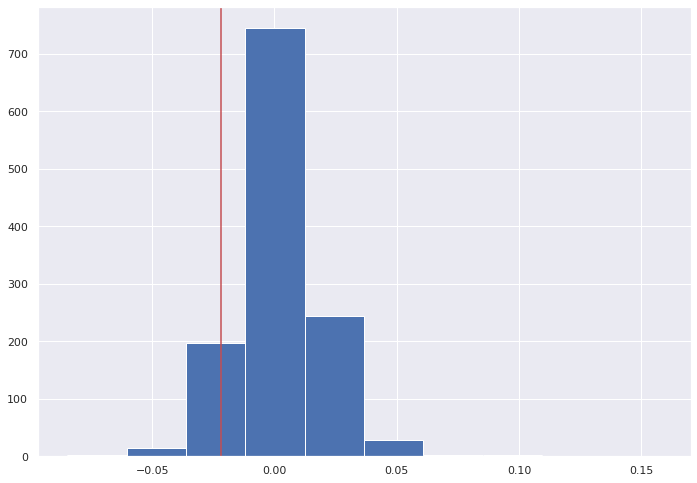

In [122]:
# Sort the returns for plotting
sorted_rets = sorted(Stock_prices_BRITANNIA['Returns'][1:])

# Plot the probability of each sorted return quantile
plt.hist(sorted_rets)

# Denote the VaR 95 quantile
plt.axvline(x=var95, color='r', linestyle='-', label='VaR 95: {0:.2f}%'.format(var95))
plt.show();

-0.032567606355803184


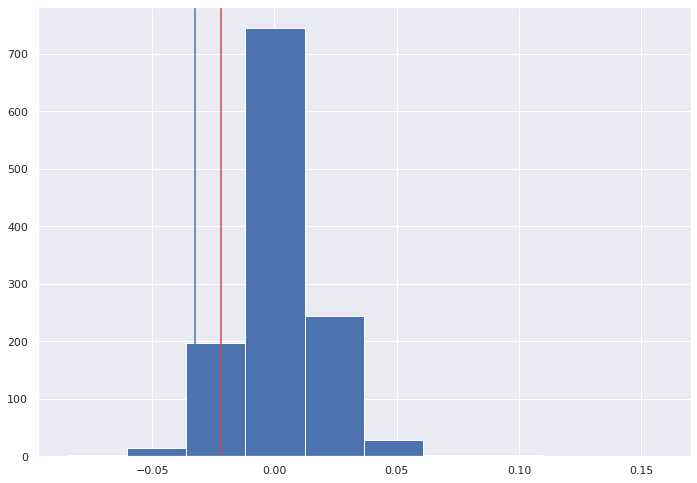

In [121]:
# Historical CVaR 95
cvar_95 = Stock_prices_BRITANNIA['Returns'][1:][Stock_prices_BRITANNIA['Returns'][1:] <= var95].mean()
print(cvar_95)

# Sort the returns for plotting
sorted_rets = sorted(Stock_prices_BRITANNIA['Returns'][1:])

# Plot the probability of each return quantile
plt.hist(sorted_rets)

# Denote the VaR 95 and CVaR 95 quantiles
plt.axvline(x=var95, color="r", linestyle="-", label='var95: {0:.2f}%'.format(var95))
plt.axvline(x=cvar_95, color='b', linestyle='-', label='cvar_95: {0:.2f}%'.format(cvar_95))
plt.show()